Importing Libraries

P.S. Bengaluru and Bangalore are the same city

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('complete_dataset.csv')
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [4]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [5]:
bangalore_population.to_csv('population_dataset.csv')
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [6]:
bangalore_income.to_csv('income_dataset.csv')
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [7]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [8]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'Central': '#5053E6',
 'Eastern': '#4410D5',
 'NorthEastern': '#1FF11B',
 'Northern': '#84B6A2',
 'SouthEastern': '#F9C50E',
 'Southern': '#8E8C3D',
 'SouthernSuburbs': '#03712B',
 'Western': '#246759'}

In [9]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
bangalore_map

### Exploring bangalore Neighborhoods using FourSquare API

In [10]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [11]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  612


In [12]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Pothy’s,12.974380,77.578346,Women's Store


In [13]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       108
Fast Food Restaurant     31
Café                     30
Bakery                   27
Ice Cream Shop           23
Department Store         21
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       15
Hotel                    11
Name: Neighborhood, dtype: int64

In [14]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  128


### Getting number of venues per neighborhood

In [15]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             7
        Domlur                     11
        Indiranagar                66
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  8
        Nandini Layout              1
        Nayandahalli                4
        Rajarajeshwari Nagar        6
        Vijayanagar                 3

[62 rows x 1 columns]

In [16]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,7
1,Central,Domlur,11
2,Central,Indiranagar,66
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
57,Western,Nagarbhavi,8
58,Western,Nandini Layout,1
59,Western,Nayandahalli,4
60,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasandra'),
 Text(0, 0, 'Electronic 

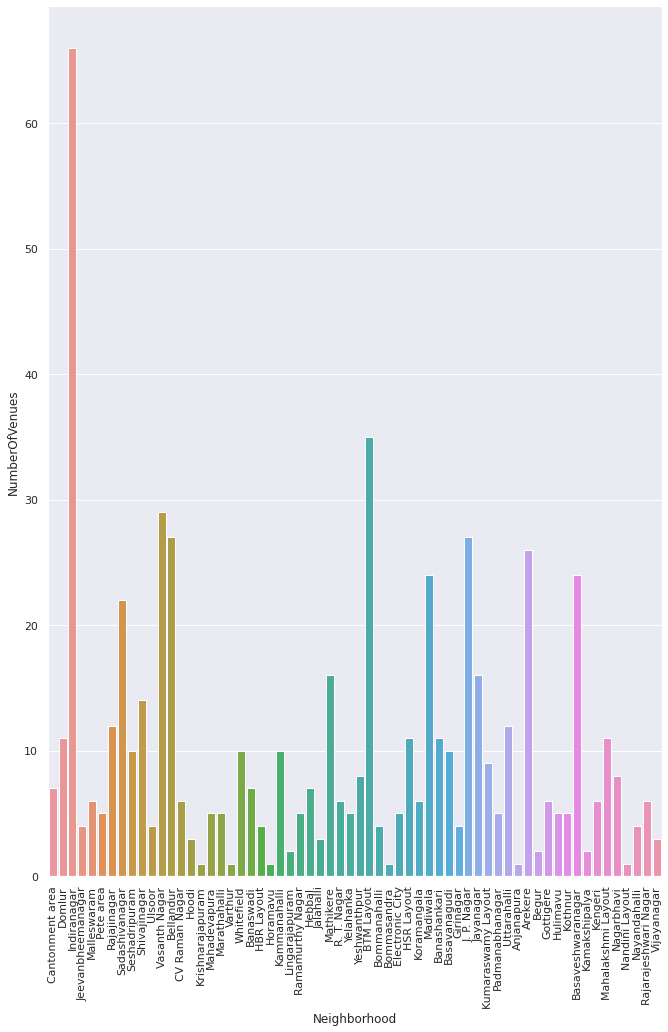

In [17]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that Inderanagar has most number of venues.

### Exploring Whitefield venues

In [18]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
238,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
239,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
240,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
241,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
242,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
243,Whitefield,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
244,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
245,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
246,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
247,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


### One hot encoding for letting us to compare different venues based on some common scale

In [19]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,...,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0

In [20]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,Anjanapura,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
1,Arekere,0.0,0.0,0.000000,0.000000,0.0,0.038462,0.0,0.0,0.038462,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,0.000000,0.0,0.038462,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.153846,0.0,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
2,BTM Layout,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.057143,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.028571,0.0,0.057143,0.0,0.000000,0.0,0.057143,0.0,0.0,0.0,0.0,0.028571,0.0,0.028571,0.0,...,0.0,0.0,0.0,0.057143,0.0,0.0,0.057143,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.028571,0.0,0.057143,0.000,0.000000,0.0,0.0,0.085714,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.000,0.0
3,Banashankari,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.181818,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.090

In [21]:
number_of_top_venues = 5
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1      Venue Category_Andhra Restaurant        0.0
2            Venue Category_Pizza Place        0.0
3               Venue Category_Pharmacy        0.0
4  Venue Category_Performing Arts Venue        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.15
1  Venue Category_Sporting Goods Shop       0.15
2          Venue Category_Pizza Place       0.08
3     Venue Category_Department Store       0.08
4       Venue Category_Ice Cream Shop       0.04


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.20
1                 Venue Category_Ice Cream Shop       0.09
2                    Venue Category_Snack Place       0.09
3  Venue Category_Vegetarian / Vegan Restaurant       0.06
4          

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [22]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [23]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Wine Bar,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Business Service,Venue Category_Liquor Store,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Sandwich Place,Venue Category_Bakery
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Men's Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Indian Restaurant
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant


In [24]:
neighborhoods_venues_sorted.shape

(62, 11)

### Find the optimal k value for clustering and we do it using the elbow method

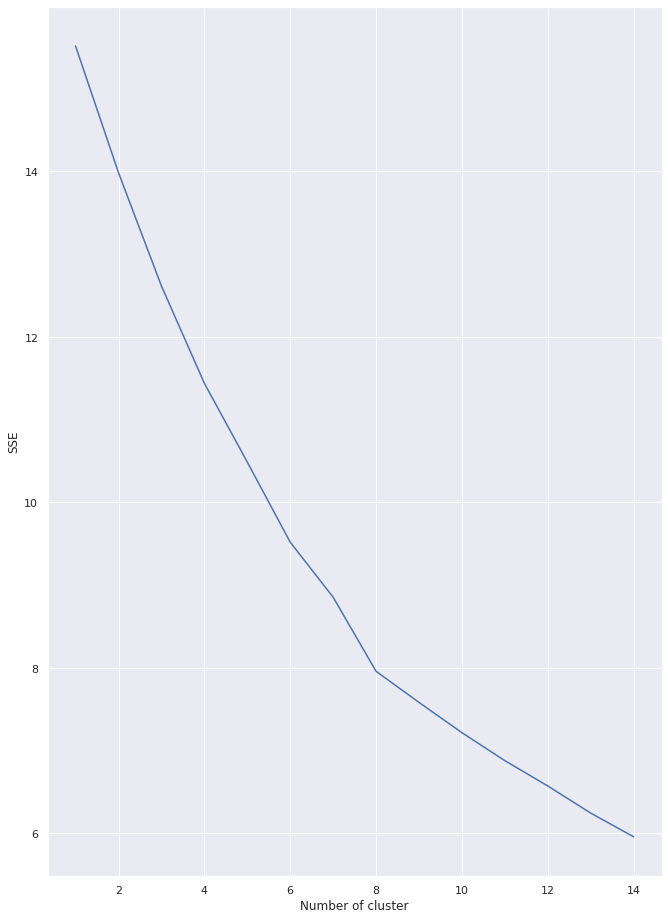

In [25]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, we can see the optimal value for cluster is 5.

In [26]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [27]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Arcade',
       'Venue Category_Art Museum', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Travel & Transport',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Cluster'],
      dtype='object', length=130)

In [28]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,...,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Wine Bar,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Business Service,Venue Category_Liquor Store,Venue Category_Bus Line,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.038462,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,0.000000,0.0,0.038462,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.153846,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Sandwich Place,Venue Category_Bakery,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.057143,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.028571,0.0,0.057143,0.0,0.000000,...,0.0,0.0,0.057143,0.0,

In [29]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [30]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Finding similar locations based on user input (recommending location)

We need to analyze factors such as population and Income to recommend.

In [31]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [32]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [33]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [34]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [35]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Recommending Veg restaurants

In [36]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,Anjanapura,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,0,0,0,1,0,1,0,...,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [38]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [39]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield'

In [40]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,...,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,589,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,590,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,591,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,592,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Cat

In [ ]:
target_cluster = 4;
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted==target_cluster]
possible_neighborhoods.head()

In [42]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 612 neighborhoods which has similar characteristics to Whitefield.


In [ ]:
possible_neighborhoods.reset_index().head()

In [44]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

Now we need to create ranking by combining population and income factors as well

In [ ]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')
possible_neighborhoods.head()

In [ ]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

In [47]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [51]:
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,...,Venue Category_Plaza,Venue Category_Pool,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Real Estate Office,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Stadium,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,589,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,590,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,591,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Eastern European Restaurant,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Hotel,Venue Category_Gym,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery


Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !

Here our model will recommend these neighborneeds and top 3 common venues to visit.